<center>
    <div style="font-size: 24px; font-weight: 500; margin-bottom: -10px">
        Climat et Changement Climatique
    </div>
    <h3>Master</h3>
    <h5 style="margin-top: -5px">Sciences de l’Océan, de l’Atmosphère et du Climat</h5>
    <h1>TP - Carbon Cycle and forcings on 20e-century</h1>
    <h2>Part I: The climate response to CO$_2$ emissions</h2>
</center>


## 1. Introduction

Over time scales of several hundred of years, atmospheric CO$_2$ is ruled by a suite of processes involving human activities (fossil fuel combustion, cement production, agriculture, deforestation), land biosphere and ocean. The temporal evolution of atmospheric CO$_2$ can be written as follows :

$$ \frac{d \text{CO}_2(t)}{dt} = E_\text{fossil} + E_\text{land-use} + S_\text{land} + S_\text{ocean}$$

Emissions $(E)$ correspond to a positive flux of CO$_2$ to the atmosphere while source minus sink $(S)$, can be either a net positive or a net negative flux of CO$_2$ to the atmosphere.

Using a first-order decay hypothesis, this formulation can be simply written as :

$$
\frac{d \text{CO}_2(t)}{dt} = E(t) - \frac{\text{CO}_2(t)}{\tau_{\text{CO}_2}}
$$

The analytical solution of this equation is called an impulsional response function or IRF. It mimics the temporal evolution of the atmopsheric CO$_2$ to a emission pulse of CO$_2$.

In this class, we will represent a simple box model to track the evolution of the atmospheric CO$_2$ in course of time.

## 2. Modelling the global carbon cycle response to external forcings

Along this notebook, Python codes are used to model and analyse the carbon cycle.
You first need to import and load required modules:  

In [1]:
# header: importing useful modules and functions
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

### 2.1 Impulse response function for atmospheric CO$_2$

In the last IPCC repor [Myrhe et al. (2013a)](https://acp.copernicus.org/articles/13/1853/2013/) propose an impulsional 
response function (IRF) derived from [Joos et al. (2013)](https://acp.copernicus.org/articles/13/2793/2013/acp-13-2793-2013.html), written as follows :

$$\text{IRF}_{\text{CO}_2}(t) = a_{C,0} + a_{C,1}\exp\left(\frac{-t}{\tau_{C,1}}\right) + a_{C,2}\exp\left(\frac{-t}{\tau_{C,2}}\right) + a_{C,3}\exp\left(\frac{-t}{\tau_{C,3}}\right) $$

The IRF describes (in percent) the evolution of CO$_2$ emmited a the time $t=0$, that remains at time $t$.\
It is defined by:
1. $a_{C,0} + a_{C,1} + a_{C,2} + a_{C,3} = 1$
2. IRF = $a_{C,0}$ when $t\rightarrow+\infty$

Now let's play with Python !

In [2]:
# definition of the parameters
a_C0, a_C1, a_C2, a_C3 = 0.2173, 0.2240, 0.2824, 0.2763
tau_C1, tau_C2, tau_C3 = 394.4, 36.54, 4.304             # given for time in year

In [3]:
# THIS CODE BLOCK DEFINED A FUNCTION TO PLOT IRF
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_irf(ti, tf, func):
    """
    Function that create a matplotlib figure and 
    plot a function 'func' between time 'ti' and 'tf' (in years)
    """  
    # create the figure
    nbcols  = int(np.log10(tf-ti))-1
    print(nbcols)
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 3), layout="constrained")

    # add data on the figure           
    t = np.arange(ti, tf)
    ax.plot(t, func(t), ls='-', label='IRF')
    ax.plot(t, func(1e18*np.ones_like(t)), ls='--', label='a_C0')

    divider = make_axes_locatable(ax)

    # split the figure in several axis to zoom out progressively  
    if ti > 0:
        i = max(int(np.log10(ti)), 2)
    else:
        i = 2
        
    t0 = ti
    while ( (10**(i+1) <= tf) and (10**i >= ti) and nbcols>1):
        ax.axis([t0, 10**i,0,1])

        ax = divider.append_axes("right", size=6/nbcols, pad=0.02, sharey=ax)
        ax.plot(t, func(t), ls='-', label='IRF')
        ax.plot(t, func(1e18*np.ones_like(t)), ls='--', label='a_C0')

        ax.set_yticks([0., 0.2, 0.4, 0.6, 0.8, 1], ['','','','','',''])

        t0 = 10**i
        i += 1
    ax.axis([t0,tf,0,1])

    # polishing the figure
    fig.axes[0].set_xlabel("time (yr)", x=max(0.5, nbcols-1))
    fig.axes[0].set_ylabel("airborne fraction (.)")

    ax.legend(loc=0)
    
    return

#### Question 1:

We start by defining the impulse response function for atmospheric CO$_2$ at a given year, $t$ :

* _Code the function IRF$_{\text{CO}_2}$ in the code block above and use the function bellow to plot the IRF between 0 and 100 years, then between 100 and 1000 years._

In [4]:
# definition of the IRF for atmospheric CO2
def irf_CO2(t):
    irf = a_C0 + a_C1 * np.exp(-t/tau_C1) + \
    a_C2 * np.exp(-t/tau_C2) + a_C3 * np.exp(-t/tau_C3)
    return irf

2


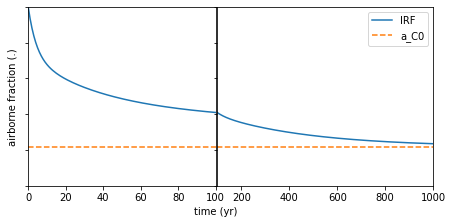

In [6]:
# plotting the impulse response
plot_irf(0, 1000, irf_CO2)

* _What are the blue curve and the dotted line ?_
   
<font color="blue">

The blue curve is the IRF for the atmospheric CO$_2$ and represents the carbon dioxyde decay in time

The orange dotted curve is the constant $a_{C,0}$ and is the fraction of CO$_2$ emissions that
remains permanently in the atmosphere.

</font>



#### Question 2:
* _From an emission pulse, how much CO$_2$ stays in the atmosphere after 10 years, 100 years, 1000 years ?_
* _How can we qualify the temporal evolution given by this model ? Does this model behave linearly in function of time ?_

In [7]:
print(irf_CO2(10), irf_CO2(100), irf_CO2(1000))

0.677540238510535 0.40942767199397434 0.2350458040153045


<font color="blue">

* About 68\% of the CO$_2$ emmitted remains in the atmosphere after 10 years, ~41\% after 100 years and ~24\% after 1000 years.

  CO$_2$ is, unlike most other agents, not destroyed by chemical reactions in the atmosphere or deposited on the earth surface, but redistributed within the major carbon reservoirs: atmosphere, ocean, land biosphere. This involves multiple timescales for exchange among and for overturning within these reservoirs. A substantial fraction of the initial perturbation by the emission pulse therefore remains in the atmosphere and the ocean for millennia.

* The temporal evolution given by this simple box-model is not linear but instead follows an exponential decay. Rapid decrease in the first few years after the emission pulse and then a continued but slow decline. Reaches a fraction of 0.5 at year 50 and a fraction of 0.4 at year 200. That means that while 50% of the initital atmospheric CO$_2$ perturbation is removed from the atmosphere withing 50 years, it takes additional 150 years to mitigate the next 10% of the perturbation. At year 1000 24% is still airborne. 
</font>

#### Question 3:
* _What should be the long-term response of an emission pulse according to this model ?
Comment on the model behaviour when t$\rightarrow\infty$_.
* _Infer if we should talk about reversibility or irreversibility ?_

<font color="blue">

* A non-negligeable part of the emmision pulse still remains in the atmosphere ($a_{C,0}$). Using this simple box-model, even at $t > 1000$ yr the response function tends to $a_{C,0}$.
  It should be noted however, that this function was designed to fit a sum of exponential with the impulse response diagnosed from multi-model mean analysis [(Joos et al., 2013)](https://acp.copernicus.org/articles/13/2793/2013/acp-13-2793-2013.html). Models were not run after year 1000 and longer timescales could therefore be expected in the real world at $t\rightarrow\infty$.

  Indeed, on multimillenium and longer time scales, geochemical and geological processes could exchange carbon dioxide [(Montenegro et al., 2007)](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2007GL030905) with the climate system (atmosphere, ocean and biosphere) with the Earth interior (external from the system): volcanic emissions, rock formations/erosions, sedimentation, etc.. However, these processes are by far too long and not relevent for the observed current climate changes. 

* Climate changes due to CO$_2$ forcings is thus considered as __irreversible__ for humans and eco-systems. 


</font>

#### Question 4:
* _According your knowledge, which Earth system components are simulated by the
various terms of the IRF equation ?_
* _What do they represent ? How do they evolve individually ?_

__Help__ : What are the units of $\tau_{C,}$ and $a_{C,}$ ?


<font color="blue">

* The IRF equation is modelled as a sum of three exponential decay. This can be interpreted as a sum of four distinct box-models somewhat representing processes associated to Earth system components (atmosphere, ocean and biosphere).
  
<div align="center"><img src="./figures/Four-box-models.png" alt="drawing" width="600"/></div>

* $a_{C,i}$ are unitless coefficients which represent a fraction that is associated with a certain nominal timescale $\tau_{C,i}$ (units in year). The three different timescales are therefore related to the time response of the three box-models (or natural CO$_2$ removal processes). It is important to note the difference in the values meaning that the process act on very different timescales: around 4, 40 and 400 years (surface adjustement, biosphere, primary production, calcification and slower deep ocean penetration). However, the interpretation for the values of $a_{C,i}$ is not straightforward, but we can notice they are all similar ~0.25 (meaning that the CO$_2$ at the equilibrium is well reparted between the four box-model (E).  
  
However, in [Joos et al. (2013)](https://acp.copernicus.org/articles/13/2793/2013/acp-13-2793-2013.html), the authors clearly note that *"the coefficients $a_{C,i}$ and $\tau_{C,i}$ have no direct process-based meaning, but are fitting parameters chosen to represent a given model-based IRF$_{CO2}$ "*.

Indeed the removal of carbon dioxide from the atmosphere is complex and involves several dynamical processes [(Solomon et al., 2009)](https://www.pnas.org/doi/10.1073/pnas.0812721106), and timescales from weeks to millennia:

* _"rapid exchange with the land biosphere and the surface layer of the ocean through air–sea exchange"_

   - in the ocean, dissolved carbon can be pumped from biological processes (primary production sedimentation or via the formation of CaCO3 used by mollusc shells and limestones).
   - exchanges with the terrestrial biosphere are linked to the functioning of ecosystems (and therefore to their seasonality): CO2 is absorbed by plants through photosynthesis, then released back into the atmosphere through respiration.
<p></p>

* _"much slower penetration to the ocean interior that is dependent upon the buffering effect of ocean chemistry along with vertical transport_".
* *"On the time scale of a millennium, the CO$_2$ equilibrates largely between the atmosphere and the ocean and, depending on associated increases in acidity and in ocean warming, typically ~20% of the added tonnes of CO$_2$ remain in the atmosphere while ~80% are mixed into the ocean."*
     
</font>

#### Question 5:
* _What is the mathemathical relationship between the sink of CO$_2$ and the IRF for
atmopsheric CO$_2$ ?_
* _Determine the formulation of this flux of CO$_2$ and produce a figure._
* _Why are the fluxes negative and what about the horizontal asymptote ?_


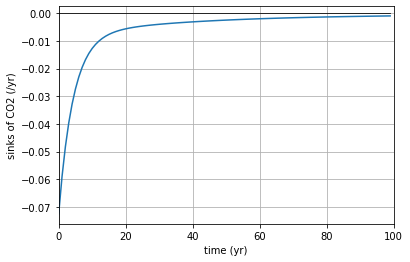

In [22]:
# definition of the carbon sink function
def sinks_CO2(t):
    irf =  -a_C1/tau_C1 * np.exp(-t/tau_C1) - a_C2/tau_C2 * np.exp(-t/tau_C2) - a_C3/tau_C3 * np.exp(-t/tau_C3)
    return irf

# plot the C sinks response to a pulse of emissions
plt.figure(figsize=(6,4))
t = np.arange(100)
plt.plot(t, np.zeros_like(t), c='k', lw=0.8)
plt.plot(t, sinks_CO2(t))
plt.xlim(0, 100)
plt.ylim(None, 0.0025)
plt.ylabel('sinks of CO2 (/yr)')
plt.xlabel('time (yr)')
plt.grid(True)

<font color="blue">

* The IRF represents the CO$_2$ and is solution to the first-order decay equation. It is unitless and shows how the CO$_2$ is removed from the atmosphere by sinks.

* Sinks of CO$_2$ $(S)$ for each year is given by the derivative of the IRF:
$$
S = \frac{\partial \text{IRF}_{\text{CO}_2}(t)}{\partial t} = -\frac{a_{C,1}}{\tau_{C,1}}\exp\left({\frac{-t}{\tau_{C,1}}}\right)
                                                              -\frac{a_{C,2}}{\tau_{C,2}}\exp\left({\frac{-t}{\tau_{C,2}}}\right)
                                                              -\frac{a_{C,3}}{\tau_{C,3}}\exp\left({\frac{-t}{\tau_{C,3}}}\right)
$$

* negative flux means CO$_2$ is removed from the atmosphere and transferred to another climate component (ocean and lands). A horizontal assymptote is observed and $S\rightarrow 0$ for $t\rightarrow\infty$ meaning the sinks do not act or the system reach an equilibrium state. However as discussed before, on multimillenium and longer time scales, geochemical and geological processes could restore atmospheric carbon dioxide to its pre industrial values [(Montenegro et al., 2007)](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2007GL030905), but are not considered here.

</font>

### 2.2 Simulated historical evolution of atmospheric CO$_2$

In this section, we will use some of the mathemathical properties of the IRF to determine the evolution of the atmospheric CO$_2$ since 1751. Direct measurement of atmospheric CO$_2$ started in 1959 (with Keeling in Revelle at Mona Loa). Data before this year are derived from paleo-climatic data like ice-core and other indirect evidences. Compare to atmospheric CO$_2$ , anthropogenic CO$_2$ emissions are pretty well known since they are estimated from human/commercial/energetical activity. They are collected by various institute and countries since decades. This emissions data are available on the Carbon Dioxide Information Analysis Center (CDIAC). We will use this emission data and our simple model to reconstruct temporal evolution of atmopsheric CO$_2$.

We first load the data:

In [25]:
# load the historical data on fossil CO2 emissions
EFF_type = np.array([line for line in \
    csv.reader(open("data/CDIAC_EFF.global.1751_2011.csv","r"))][2:],dtype=float)[:,2:-1] / 1000 * 44/12. #{GtCO2/yr}
EFF_lgd = [line for line in \
    csv.reader(open("data/CDIAC_EFF.global.1751_2011.csv","r"))][0][2:-1]
EFF = np.sum(EFF_type,1)

Since these data are given in GtCO2 /yr and atmopsheric CO2 is usually measured in ppm, we need a conversion factor.


*"To directly compare CO2 emissions to atmospheric CO2 levels, both sets of data can be converted to gigatonnes of CO2. The CO2 emissions data is typically expressed in gigatonnes carbon (GtC). One gigatonne is equal to 10$^9$ tonnes. This means they've only included the carbon element of the carbon dioxide molecule. The atomic mass of carbon is 12, while the atomic mass of CO2 is 44. Therefore, to convert from gigatonnes carbon to gigatonnes of carbon dioxide, you simply multiply 44 over 12. In other words, 1 gigatonne of carbon equals 3.67 gigatonnes of carbon dioxide."*

*"Atmospheric CO2 levels are expressed in parts per million by volume (ppm). To convert from ppm to gigatonne of carbon, the conversion tables of the Carbon Dioxide Information Analysis Center advise that 1 part per million of atmospheric CO2 is equivalent to 2.13 Gigatonnes Carbon. Using our 44 over 12 rule, this means 1ppm = 7.8 Gigatonnes of Carbon Dioxide in the atmosphere."*

_Source from https://skepticalscience.com/print.php?r=45_

In [26]:
# use the IRF to simulate past changes in atmospheric CO2 conversion factor
k_CO2 = 2.13 * 44 / 12 #{GtCO2/ppm}

#### Question 6:
* _Produce a figure showing the temporal evolution of the different type of fossil CO2 emissions._

__Help__ : the different types are given by in legend of the CSV file:

In [27]:
# print legend
EFF_lgd

['Carbon emissions from gas fuel consumption',
 'Carbon emissions from liquid fuel consumption',
 'Carbon emissions from solid fuel consumption',
 'Carbon emissions from cement production',
 'Carbon emissions from gas flaring']

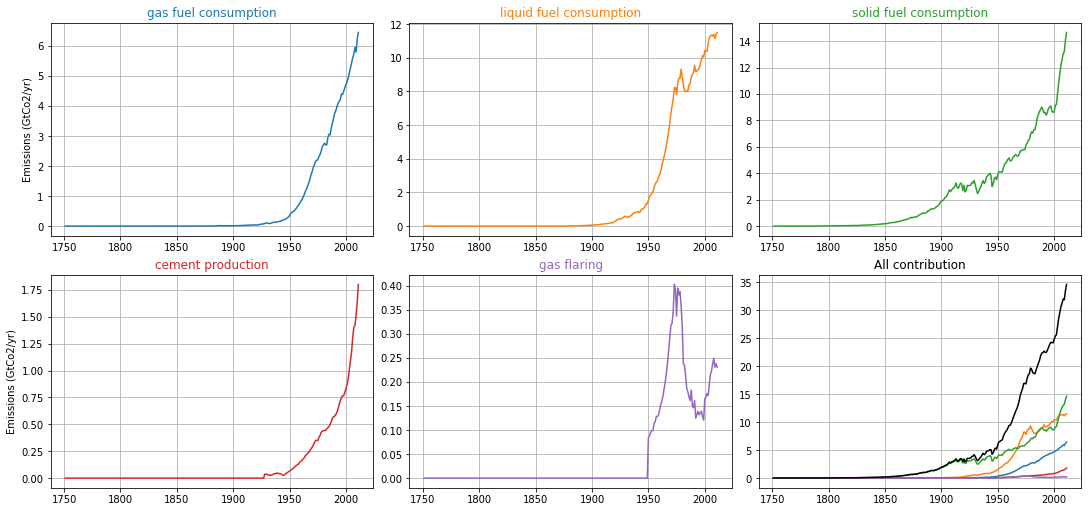

In [32]:
fig, axs = plt.subplots(2, 3, layout='constrained', figsize=(15, 7))
gridspec = axs[0, 0].get_subplotspec().get_gridspec()

colors   = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 

for i in range(len(EFF_lgd)):
    lgd = EFF_lgd[i]
    typ = EFF_type[:,i]
    col = colors[i]

    ax  = axs[i//3, i%3] 

    ax.set_title(lgd.split('Carbon emissions from ')[1], y=1, color=col)
    ax.plot(np.arange(1751, 1751+len(typ)), typ, color=col)

    axs[1,2].plot(np.arange(1751, 1751+len(typ)), typ, color=col, label=lgd)

    ax.grid(True)

    if i%3 == 0:
        ax.set_ylabel("Emissions (GtCo2/yr)")


axs[1,2].set_title('All contribution')
axs[1,2].plot(np.arange(1751, 1751+len(EFF)), EFF, color='k', label='total')

axs[1,2].grid(True)

#### Question 7:

We want to use the IRF to simulate the net evolution of atmospheric CO$_2$ from historical CO$_2$ emissions.
We consider 3 methods to determine the temporal evolution of the atmospheric CO$_2$:
1. use of Python function to determine the convolution of emission data and our model response
2. explictely resolving the convolution
3. solving equation for the time-evolution of CO$_2$ concentration using 4 states variables. These four states variables correspond to the coefficients of the IRF (a$_C,$)

__Note:__ the third method implies that a model with a set of two coefficients would have require solely two states variables
to be solved.

In [33]:
# 1. using the built-in Python convolution function
t = np.arange(len(EFF))
D_CO2_mod1 = 1/k_CO2 * np.convolve(EFF,irf_CO2(t))[:len(t)]

# 2. explicitly calculating the convolution (going through each timestep)
D_CO2_mod2 = np.zeros(np.shape(EFF))
for t in range(len(EFF)):
    D_CO2_mod2[t] = 1/k_CO2 * np.sum(EFF[:t+1] * irf_CO2(np.arange(t+1))[::-1]) # [::-1] to turn around the order

# 3. solving the equation 
D_CO2_mod3 = np.zeros(np.shape(EFF))

D_C0, D_C1, D_C2, D_C3 = 0, 0, 0, 0
for t in range(len(EFF)):
    D_C0 += a_C0 * EFF[t]
    D_C1 += a_C1 * EFF[t] - D_C1/tau_C1
    D_C2 += a_C2 * EFF[t] - D_C2/tau_C2
    D_C3 += a_C3 * EFF[t] - D_C3/tau_C3
    D_CO2_mod3[t] = 1/k_CO2 * (D_C0+D_C1+D_C2+D_C3)

* _Produce figures corresponding to the three reconstruction approaches and compare
results._

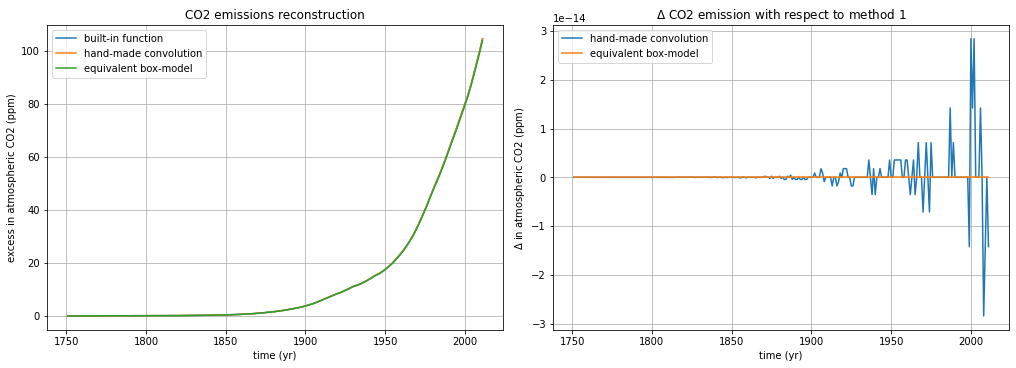

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', figsize=(14, 5))

ax1.set_title("CO2 emissions reconstruction")
ax1.plot(np.arange(1751,1751+len(EFF)),D_CO2_mod1,label='built-in function')
ax1.plot(np.arange(1751,1751+len(EFF)),D_CO2_mod2,label='hand-made convolution')
ax1.plot(np.arange(1751,1751+len(EFF)),D_CO2_mod3,label='equivalent box-model')
ax1.set_ylabel('excess in atmospheric CO2 (ppm)')
ax1.set_xlabel('time (yr)')
ax1.grid(True)
ax1.legend(loc=0)

ax2.set_title(r"$\Delta$ CO2 emission with respect to method 1")
ax2.plot(np.arange(1751,1751+len(EFF)), D_CO2_mod2 - D_CO2_mod1, label='hand-made convolution')
ax2.plot(np.arange(1751,1751+len(EFF)), D_CO2_mod3 - D_CO2_mod3, label='equivalent box-model')
ax2.set_ylabel(r'$\Delta$ in atmospheric CO2 (ppm)')
ax2.set_xlabel('time (yr)')
ax2.grid(True)
ax2.legend(loc=0)

<font color="blue">
The three methods are very similar and show exponential growth in CO$_2$ emissions. Comparison of the three methods is not really interesting but the idea is to understand how convolution works !
</font>

#### Question 8:

* _Compare results of your reconstruction of atmospheric CO2 to that used in the last
IPCC report ([Ciais et al., 2013](https://www.ipcc.ch/report/ar5/wg1/carbon-and-other-biogeochemical-cycles/)):_

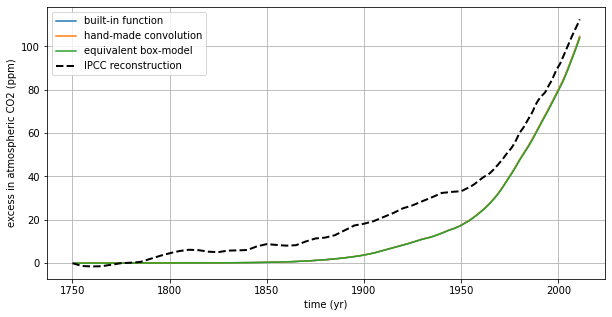

In [39]:
# load atmospheric CO2 reconstruction by IPCC
CO2_ipcc = np.array([line for line in csv.reader(open('data/HistAtmo_IPCC.1750-2011.CO2.csv','r'))],dtype=float)[:,0] #{ppm}

# compare the three simulated atmospheric CO2 and the reconstruction


plt.figure(figsize=(10, 5))
plt.plot(np.arange(1751,1751+len(EFF)),D_CO2_mod1,label='built-in function')
plt.plot(np.arange(1751,1751+len(EFF)),D_CO2_mod2,label='hand-made convolution')
plt.plot(np.arange(1751,1751+len(EFF)),D_CO2_mod3,label='equivalent box-model')
plt.plot(np.arange(1750,1750+len(CO2_ipcc)),CO2_ipcc-CO2_ipcc[0],color='k',lw=2,ls='--',label='IPCC reconstruction')
plt.ylabel('excess in atmospheric CO2 (ppm)')
plt.xlabel('time (yr)')
plt.grid(True)
plt.legend(loc=0)

#### Question 9:

* _Identify missing processes : A better fit would imply greated sources of CO$_2$ or greater sink of CO$_2$ ?_

<font color="blue">
IPCC reconstruction of atmospheric CO$_2$ shows greater value that our reconstruction from the IRF fitted from Earth system models. This seems to indicate that these models do no represent all the processes to get greater sources of CO$_2$. In particular, land-use changes caused by human activities (agriculture and deforestation) are not or poorly represented in Earth system and climate models. 
</font>

#### Question 10:

* _Propose a concluding sentence_

<font color="blue">
    
In this part, we have used a simple box model to represent the response of the climate system to a pulse of carbon dioxyde emission. 
This simple model is made of three exponential decays and represent the CO$_2$ redistribution between climate components through many dynamical and biogeochemical processes. Parameters (coefficients $a_{C,i}$ and timescales $\tau_{C,i}$) are numerically tuned by [Joos et al. (2013)](https://acp.copernicus.org/articles/13/2793/2013/acp-13-2793-2013.html) to fitted results from complex Earth system models that represent some of these processes. 

While the simple model allows easy computation and analytical solution, it encompasses several different climate models and therefore hide inter-model disparities. Another limitation remains in the fact that Earth system models can also lead to incertitudes (modelling choices, numerical errors, unknown processes, etc..)

Outputs from these models will be analysed in the second part of this lecture. 
</font>

### 2.3 (Bonus) Improving the representation of the carbon cycle

Previous results should have pointed out the fact that important process of the global carbon cycle is missing. Here, we will try to improve the model by adding this process so-called the land-use change (LUC). This latter is related to human activities over land, i.e. agriculture and deforestation. 

We are now using an "inversion method" to determine the flux of CO$_2$ due to land-use changes from observations.
An inversion consists in finding the best fit of parameters of a system from observations of a measurable metric of this system.
This method is used to estimate emissions $(E)$ and sinks $(S)$ of CO$_2$ from measures of CO$_2$ concentration in the atmosphere. 

Consider a perfect transport model of the atmosphere $h$ which take the flux of CO$_2$, $x_t$ at the surface as input and computes the atmospheric flux of CO$_2$, $y_t$, as output. At each point, $y_t = h(x_t)$. The inversion (of the function $h$) consists in estimating the surface flux $x_t$ from measures of atmospheric flux $y_t$.     

The following pieces of Python code will help to determine the amplitude of land-use changes, running our model in "inversion mode":

In [40]:
# inversion of ELUC needed to fit reconstructed CO$_2$
ELUC_inv = np.zeros(np.shape(EFF))

# define an error function
def err(e,t):

    # create ELUC vector used in error function
    ELUC_tmp = ELUC_inv.copy()
    ELUC_tmp[t:] = 0
    ELUC_tmp[t] = e[0]
    
    # calculate simulated CO2
    D_CO2_tmp = 1/k_CO2 * np.sum((EFF+ELUC_tmp)[:t+1] \
                * irf_CO2(np.arange(t+1))[::-1])
    
    return ( D_CO2_tmp - (CO2_ipcc[t+1]-CO2_ipcc[0]) )**2

# fit at every time-step
for t in range(len(EFF)):
    ELUC_inv[t] = fmin(err, [0], args=(t,),disp=False)[0]

#### Question 11:

* _Compare the result you obtained with the inversion to the estimated from [Le Quéré et al. (2013)](https://essd.copernicus.org/articles/6/235/2014/), available using the following code :_

```python
# load historical emissions from land-use change
ELUC_data = np.array([line for line in \
    csv.reader(open("data/GCP+_ELUC.global.1850_2010.csv","r"))], dtype=float)[:,0] / 1000 * 44/12. #{GtCO2/yr}
```

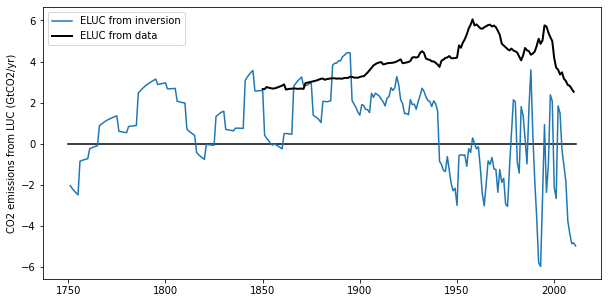

In [42]:
# load historical emissions from land-use change
ELUC_data = np.array([line for line in \
    csv.reader(open("data/GCP+_ELUC.global.1850_2010.csv","r"))], dtype=float)[:,0] / 1000 * 44/12. #{GtCO2/yr}

# plot figure
plt.figure(figsize=(10,5))
plt.plot(np.arange(1750,2012),np.zeros(2012-1750),'k-')
plt.plot(np.arange(1751,1751+len(ELUC_inv)),ELUC_inv,label='ELUC from inversion')
plt.plot(np.arange(1850,1850+len(ELUC_data)),ELUC_data,color='k',lw=2,label='ELUC from data')
plt.ylabel('CO2 emissions from LUC (GtCO2/yr)')
plt.legend(loc=0)

#### Question 12:

* *Discuss the results of our estimate of $E_\text{LUC}$ in regards of the uncertainties of 50% (or 1 GtCO$_2$/yr) in land-use-induced CO$_2$ emission*

<font color="blue">
Not a lot to say here, except is an ugly figure and results are really noisy and pretty bad (up to 4GtCO2/yr againt 1 GtCO2/yr uncertainty). The point is to keep attention of students on the inversion method..
</font>